# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [21]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))


Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [22]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices,ddof = 1)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,340.28


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**



**Answer: **

**1.**In case of 'RM' values(number of rooms) and 'MEDV' ,There should be ***increase*** in 'MEDV' if 'RM' value ***increase*** and vice-versa considering all rooms for different  homes nearly equal because As 'RM' increases,it costs much to build the homes.

**2.**In case of 'LSTAT',There should be ***decrease*** in 'MDEV' if 'LSTAT' value ***increase*** because the demand for such society in which 'LSTAT' is high will be less  compare to society with low 'LSTAT' value.So,Due to demand,price of home with low 'LSTAT' value will be high compare to price of home with high 'LSTAT' value  will be low.  

**3.**In case of 'PTRATIO' values as well,There should be ***decrease*** in 'MDEV' if 'PTRATIO' value ***increase*** because
people will consider best if 'PTRATIO' value will be low.So,It will increase the demand of home with low 'PTRATIO' values.
Market will start paying more for it.So,price for such home will be high in comparision with home with high 'PTRATIO' values. 

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [23]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [24]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

**Answer:** Coefficient of determination(R^2) is the proportion which tell about,to which extent dependent variable can be predicted from independent variable.

    R^2 is  the ratio of the explained variance  to the total variance.
    
       where  1.explained variance is  variance of the model's predictions
              2.total variance is sample variance of the dependent variable

            R^2 lies between 0 and 1.
           
           1.R^2 value 0 means that dependent variable can't be predicted from independent
             variable.
           2.R^2 value 1 means that dependent variable perfectly predicted from independent
             variable but it generally can't consider good.It shows auto correlation among 
             Training dataset.
           3.R^2 value between 0 and 1 shows that how much dependent variable can be predicted
             from independent variable.
           

Generally R^2 values range from 0.4 to 0.6 is consider  good for Linear Regression or muliple regression but if we want best prediction then till 0.9,it is good.As R^2 increases from 0.9 then it will be due to the auto correlation among different values of dataset.This causes overfiting in model design.In overfitting,model works very well for Training dataset but very poor for Testing or some new dataset and that is not great situation.So,For most of the model,we consider data values should be  independent of each other.

So,It is possible that this model wouldn't have successfully captured the variation of the target variable and won't make good prediction for new data points.we can remove the situation by excluding the correlated data point.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

In [25]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)

# Success
print("Training and testing split was successful.")


Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Answer: **It has great benefit of spliting the data in some ratio of training and testing subsets for a learning algorithm.

            If we use same training data for testing  purpose as well.Then, learning algorithm 
            will make predict 100%  accurate but at the same time,if new data is given for 
            making prediction.It is highly chance that it will make completely wrong prediction.
            So, it is good to split dataset into some ratio of training and testing set.and use 
            testing set for the purpose of testing the algorithm which is not used at time of 
            training the learning algorithm.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

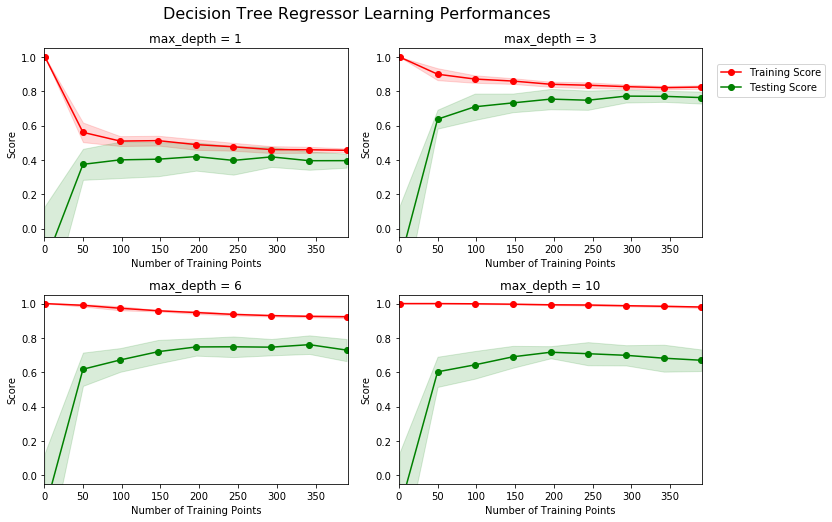

In [26]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Answer: **
             I  will prefer to choose max_depth = 3.It represents the ideal scenario among four grapgh for a descision three                 model.  
            
           Initially,As the number of Training points increases upto 200.The Training score 
           decreases gradually and then,further addition of Training points till it reaches
           upto approximately 330.The Training score decreases slowly and it gets almost 
           saturated after that.
            
           Initially,The Testing score increases sharply till Training points reach upto 
           nearly 50.Then,Testing Score score doesn't increases fast that  much upto 
           approximately 300.and further,it gets almost saturated.
            
           It may be that Training points(100-200) benifit the model very well but Training
           Score and Testing score already become saturate.So,Further Increament in Training 
           points may only increase the Time Complexity and reduce the efficiency of algorithm.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

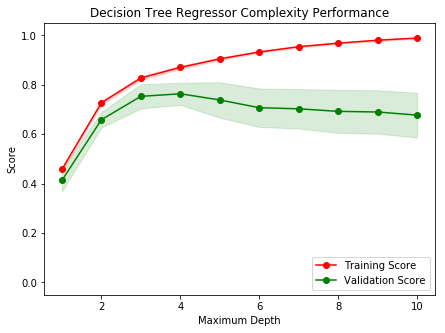

In [27]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?


**Answer: ** 
            
            1.The model will suffer from high bias(underfitting) when it trained with a
              maximum depth of 1.
            2.The model will suffer from high variance(overfitting) when it is trained 
              with a maximum depth of 10.
     
     
3.I can make conclusions based on the visual cues of  consistent change in  validation score on different Training score.
It can be seen that the low gap of training and validation curves at max-depth of 1 and the large gap between the 
training and validation curves at a max-depth of 10.

Generally,a model is suffer from high bias(underfitting) when a simple model is  created.It may be due to use of less number
of training data points or less nunmber of features.This model's coefficient of determination(R^2) is very low.A model is 
suffer from high variance(overfitting) when a complex model is created.It may be due to use of large number of training data
points or large number of features.This model's coefficient of determination(R^2) is very high.




### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

 Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: **

            I think that maximum depth of 3  in a model that best generalizes to unseen
            data.if we consider range then, it should be between 2.5 to 4.
            
            At this maximum depth,Training score is approximately 0.8 which isn't too much
            high which is a sign of high variance(overfitting) and too much low which is sign 
            of high bias underfitting.Validation score is also good and it is about 0.7.It 
            means that low gap between Training score and Validation score.So,it leads to 
            assume that at maximum depth of 3,depended variable will well predicted by learning 
            algorithm.           

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

**Answer: ** There are two type of parameter in machine learning.

           1.paramters that are learned from the training data, for example, the weights
             in linear regression.
           2.Learning algorithm has some parameter that are optimized separately.These 
             the basically tuning parameters.it is also called hyperparameters of a model.
             for example, the regularization parameter in logistic regression or the depth 
             parameter of a decision tree.
               
               
           Grid search is a powerful tunning parameter optimization technique that can  help 
           to improve the performance of a model by finding the optimal combination of 
           hyperparameter values.
               
           It is a search paradigm where we specify some values for different tunning parameter
           and it makes various different combination of those paramter and check the model 
           performance to obtain the optimal set.
             
             
            -->Exhaustive Grid Search
                      The grid search is sometimes done by GridSearchCV in which it implements 
                      the usual estimator API: when "fitting" it on a dataset all possible 
                      combination of parameter is created, thenall combination get evaluated 
                      and the best combination is kept.It is possible that GridSearchCV may be 
                      computationally expensive sometime for larger dataset.  
                         
                         
            -->Randomized Parameter Optimization
                      There is another technique which is used in alternative of GridSearchCV 
                      is RandomizedSearchCV in which a fixed number of parameter settings is 
                      sampled from the specified distribution.
                          
            There are mainly two benfits of it over Exhaustive Grid Search:
                   1.A computation budget can be chosen independently without any concern 
                     about number of parameters and possible values. 
                   2.Parameters that do not change the performance will not decrease the 
                     efficiency. 
            

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 
* What benefit does this technique provide for grid search when optimizing a model?

**Answer: ** 

            In k-fold cross-validation technique,the original sample is  divided randomly
            into k equal size subsamples in which k-1 subsamples is used as training dataset 
            and one subsample is kept as validation dataset for model.This technique is 
            repeated for k-times(folds) and  each subsample used as validation dataset at
            once.Parameter can make adjustment until the  estimator perform optimally.So,
            validation is required in this case and we use validation dataset for this
            purpose and further,evaluation is done on Test dataset.Then,The average is 
            calculating for k-result to get a single estimation.


            -->The main advantage of k-fold cross-validation technique is that all subsamples
               are used for both training and validation.


            The work of grid search technique is to perform  making optimal combination of
            hyperparamter values to improve the performance of model.If it is not using 
            k-fold cross-validation technique,then it will result in model being tuned only
            to a specific subset of data.This is because without using cross-validation 
            technique,only using k-fold to create training and testind data points,
            won't suffle the data points.This big issue is fixed by cross-validation.

          

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [28]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer 
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':np.arange(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid =  GridSearchCV(regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [29]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


**Answer: ** 
            
            Maximum depth for optimal model  is 4.
            for question no. : 6,
                 I made a guess that max depth is 3.If we talk about range then,it should
                 be 2.5 to 4.
            for question no. : 9,
                 maximum depth comes out 4 for optimal model.
                 
            It doesn't surprises me because training score and validation score for question
            no.6 that i considered for prediction of maximum depth for optimal model are about
            0.8 and 0.7 respectively.
            
            
            The output for maximum depth in question no. 9 shows that training score is between
            0.8 and 0.9, validation score is about 0.7.   
            

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

Run the code block below to have your optimized model make predictions for each client's home.

In [31]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


**Answer: ** 

            Some statistic about dataset:
            Minimum price: $105,000.00
            Maximum price: $1,024,800.00
            Mean price: $454,342.94
            Median price $438,900.00
            Standard deviation of prices: $165,340.28


          If we compare among only these 3 clients.Then,these prices seems reasonable
            because
           Client 1: The selling price of home is $403,025 and It is within the one standard 
                     deviation from mean values($454,342) as well.It's 'LSTAT' and 'PTRATIO' 
                     values are low compare to Client 2 and high compare to Client 3 and 'RM'
                     value is greater than Client 2 and less than Client 3.Therefore,it's 
                     price must be between Client 2 and Client 3 home's price and So,it is.It's 
                     market demand will be high compare to Client 2 and low compare to Client 3.
                     So,This Selling price seems reasonable for it.
                      
           Client 2: The selling price of home is $237,478.72.It's 'LSTAT' and 'PTRATIO' value
                     is  high compare to  Client 2 and Client 3 and 'RM' value is  less than 
                     Client 2 and Client 3.Therefore, it's price must be below Client 1 and 
                     Client 3 home's price and it is.The market demand for this home will be
                     low because of high 'LSTAT' and 'PTRATIO' values. It's predicting price
                     also reflect it very well.
                      
                      
           Client 3: The selling price of home is $931,636.It's 'LSTAT' and 'PTRATIO' value is
                     low compare to Client 2 and Client 3 and 'RM' value is greater than Client
                     2 and Client 3. The  market demand for this home will be very high because 
                     of very low 'LSTAT' and 'PTRATIO' values.So,it's price is very high and it 
                     is near to maximum value.
                      
                      
            They get selling price for their home truely on the basis of 'RM','LSTAT' and 
            'PTRATIO' values.          
                      

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [32]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  


**Answer: **

               The data that was collected from 1978 isn't relevant today because  today's 
              economy is far different from 1970's. The inflation is very high now-a-days 
              compare to that period.The features that is present in dataset makes the 
              simple model for predicting the house price.In general case, we can use such
              dataset for generating a model but these features isn't sufficient for genuine
              purpose. The quality of appliances in the home, square feet of the plot area,
              presence of pool etc features highly regulates the price of homeas well. This
              model isn't even robust enough to make consistent predictions.This model isn't
              well generalized.It provides range of price of home as running it multiple times
              for particular client.So,This model shouldn't be used in real-world setting.
             
         In my opinion,
             -->  The data collected in urban city wouldn't be applicable for home's price 
                  prediction in a rural city.In todays  world,Everyone wants to live in high
                  society and with well known person as well and many things. So, people 
                  increases the demand of house of urban society's home.So,pricing too go high
                  for that home.
            